시계열 데이터에서의 이상 탐지는 매우 중요한 과제 중 하나로, 정상적인 패턴에서 벗어난 데이터 포인트를 식별하는 과정입니다. 이상 현상은 크게 세 가지 유형으로 나눌 수 있는데, 여기서는 'Point Anomaly'에 초점을 맞추겠습니다. 'Point Anomaly'는 데이터의 단일 포인트가 다른 정상적인 데이터 포인트와 크게 다를 때 발생합니다.

아래는 시계열 데이터에 Point Anomaly를 도입하는 함수를 정의하는 방법입니다. 이 함수는 다음 단계를 포함합니다:

1. **기본 시계열 데이터 생성**: 정상 범위 내에서 무작위 데이터를 생성합니다. 예를 들어, 사인 함수(sine wave)를 사용할 수 있습니다.
2. **이상 데이터 포인트 도입**: 정의된 정상 데이터 패턴에 이상 값을 도입하여 이상 상황을 시뮬레이션합니다. 이상 값은 일반적으로 데이터의 정상 범위를 벗어나는 값을 가집니다.

### 기본 함수 정의

이 함수는 다음 파라미터를 받습니다:

- `num_points`: 생성할 데이터 포인트의 총 수
- `anomaly_rate`: 전체 데이터 포인트 중 이상 데이터 포인트의 비율
- `normal_range`: 정상 데이터 포인트의 범위 (예: `(0, 1)`)
- `anomaly_range`: 이상 데이터 포인트의 범위 (예: `(5, 10)`)

함수는 정상 데이터 포인트와 이상 데이터 포인트가 혼합된 시계열 데이터를 생성합니다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series_with_anomalies(num_points=1000, 
                                        anomaly_rate=0.01, 
                                        normal_range=(0, 1), 
                                        anomaly_range=(5, 10), 
                                        include_sine=False, 
                                        include_cosine=False):
    # 기본 시계열 데이터 생성
    time_series = np.random.uniform(low=normal_range[0], high=normal_range[1], size=num_points)

    # 이상 데이터 포인트 수 계산
    num_anomalies = int(num_points * anomaly_rate)

    # 이상 데이터 포인트의 인덱스 선택
    anomaly_indices = np.random.choice(num_points, num_anomalies, replace=False)

    # 선택된 인덱스에 이상 데이터 포인트 도입
    for idx in anomaly_indices:
        time_series[idx]+= np.random.uniform(low=anomaly_range[0], high=anomaly_range[1])

    # 사인 파형 추가
    if include_sine:
        time_series += np.sin(np.linspace(0, 20, num_points))

    # 코사인 파형 추가
    if include_cosine:
        time_series += np.cos(np.linspace(0, 20, num_points))

    return time_series, anomaly_indices


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series_with_anomalies(num_points=1000, 
                                        anomaly_rate=0.01, 
                                        normal_range=(0, 1), 
                                        anomaly_range=(5, 10), 
                                        include_sine=False, 
                                        include_cosine=False):
    # 기본 시계열 데이터 생성
    time_series = np.random.uniform(low=normal_range[0], high=normal_range[1], size=num_points)

    # 사인 파형 추가
    if include_sine:
        time_series += np.sin(np.linspace(0, 20, num_points))

    # 코사인 파형 추가
    if include_cosine:
        time_series += np.cos(np.linspace(0, 20, num_points))

    # 이상 데이터 포인트 수 계산
    num_anomalies = int(num_points * anomaly_rate)

    # 이상 데이터 포인트의 인덱스 선택
    anomaly_indices = []

    # 이상 데이터 포인트가 골고루 분포하도록 생성
    interval = num_points // num_anomalies
    for i in range(num_anomalies):
        start_idx = i * interval
        end_idx = (i+1) * interval

        # 이전 이상치와의 거리에 따라 인덱스 선택
        idx = np.random.randint(start_idx, end_idx)

        # 이미 선택된 인덱스인 경우 다시 선택
        while idx in anomaly_indices:
            idx = np.random.randint(start_idx, end_idx)

        anomaly_indices.append(idx)

    # 선택된 인덱스에 이상 데이터 포인트 도입
    for idx in anomaly_indices:
        time_series[idx]+= np.random.uniform(low=anomaly_range[0], high=anomaly_range[1])

    return time_series, anomaly_indices


[27, 128, 291, 300, 485, 536, 617, 744, 845, 980]


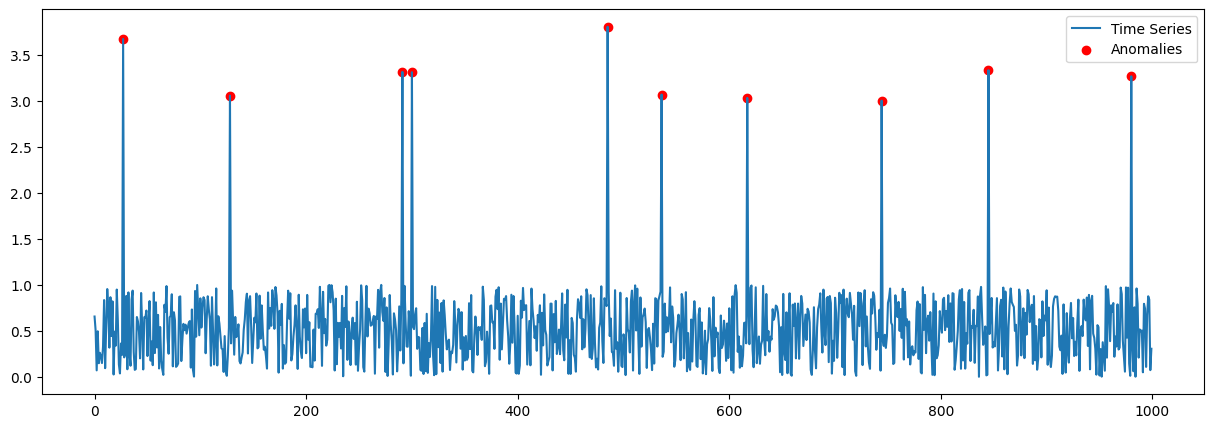

In [24]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=False
include_cosine=False

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()

[99, 137, 285, 348, 445, 522, 681, 796, 876, 921]


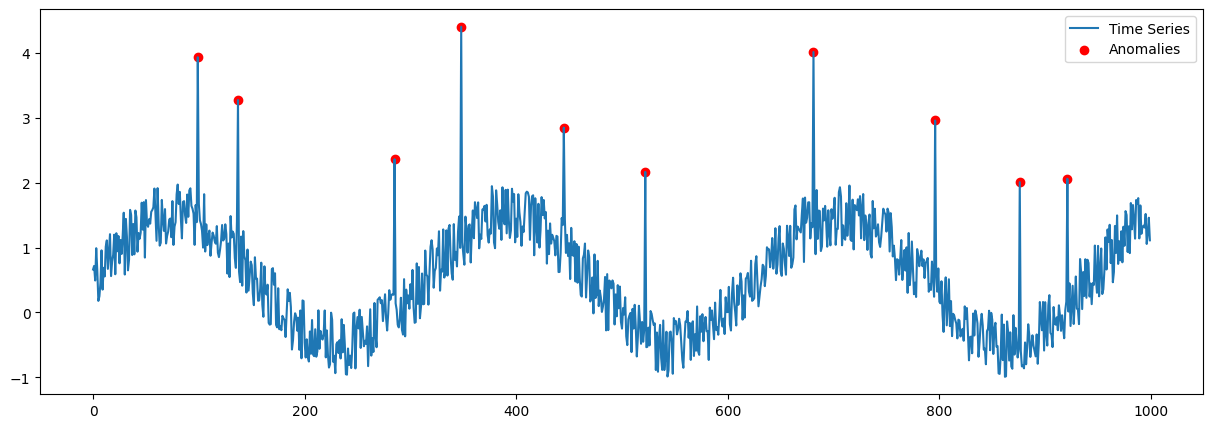

In [26]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=True
include_cosine=False

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()

[8, 158, 227, 301, 439, 572, 647, 725, 834, 938]


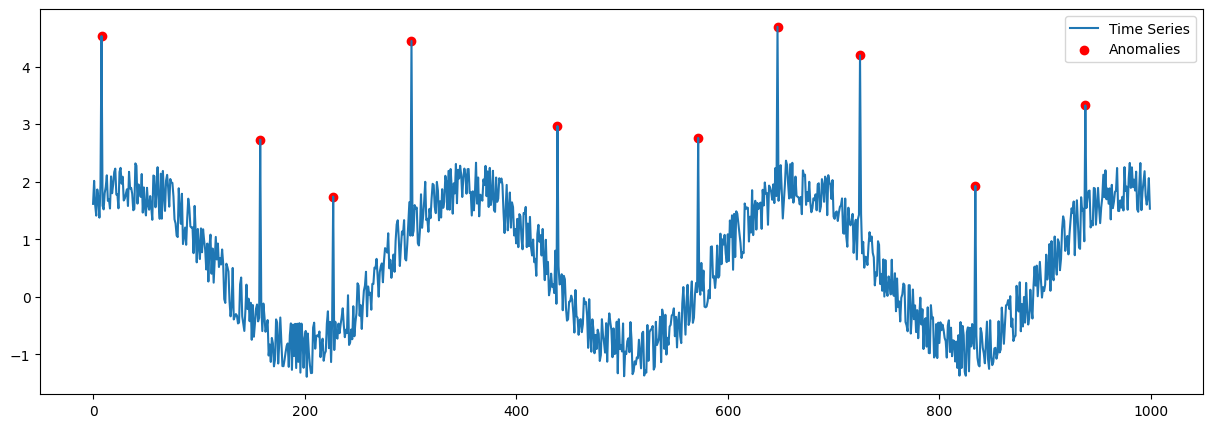

In [25]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=True
include_cosine=True

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series_with_anomalies(num_points=1000, 
                                        anomaly_rate=0.01, 
                                        normal_range=(0, 1), 
                                        anomaly_range=(5, 10), 
                                        include_sine=False, 
                                        include_cosine=False,
                                        anomaly_length=3,
                                        additional_anomaly_prob=0.5,
                                        freq=20,
                                        amp =0.5
                                       ):
    # 기본 시계열 데이터 생성
    time_series = np.random.uniform(low=normal_range[0], high=normal_range[1], size=num_points)

    # 사인 파형 추가
    if include_sine:
        time_series += amp * np.sin(2 * np.pi * freq * np.linspace(0, 20, num_points))

    # 코사인 파형 추가
    if include_cosine:
        time_series += amp * np.cos(2 * np.pi * freq * np.linspace(0, 20, num_points))

    # 이상 데이터 포인트 수 계산
    num_anomalies = int(num_points * anomaly_rate)

    # 이상 데이터 포인트의 인덱스 선택
    anomaly_indices = []

    # 이상 데이터 포인트가 골고루 분포하도록 생성
    interval = num_points // num_anomalies
    for i in range(num_anomalies):
        start_idx = i * interval
        end_idx = (i+1) * interval

        # 이전 이상치와의 거리에 따라 인덱스 선택
        idx = np.random.randint(start_idx, end_idx)

        # 이미 선택된 인덱스인 경우 다시 선택
        while idx in anomaly_indices:
            idx = np.random.randint(start_idx, end_idx)

        # 연속적인 이상 데이터 포인트 생성
        for j in range(idx, idx + anomaly_length):
            if np.random.choice([True, False], p=[additional_anomaly_prob, 1-additional_anomaly_prob]):
                time_series[j]+= np.random.uniform(low=anomaly_range[0], high=anomaly_range[1])
                anomaly_indices.append(j)

    return time_series, anomaly_indices


[9, 10, 12, 13, 135, 136, 138, 218, 220, 222, 301, 305, 488, 490, 491, 523, 524, 526, 527, 613, 614, 615, 617, 717, 830, 832, 987, 989]


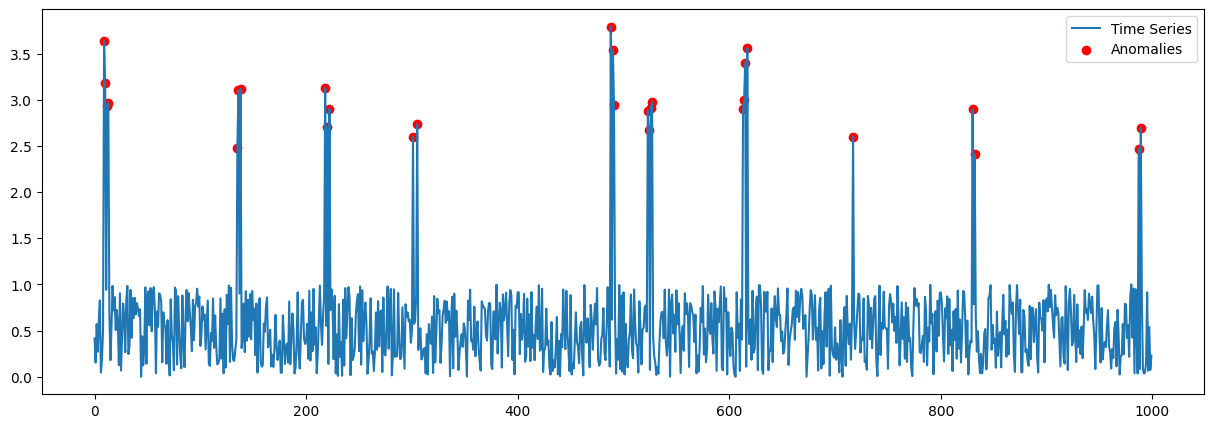

In [57]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=False
include_cosine=False
anomaly_length = 5
additional_anomaly_prob=0.5

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine,
                                                                   anomaly_length,
                                                                   additional_anomaly_prob)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()

[20, 22, 23, 150, 151, 152, 153, 261, 263, 264, 311, 312, 315, 506, 507, 634, 635, 637, 887, 888, 889, 919, 920]


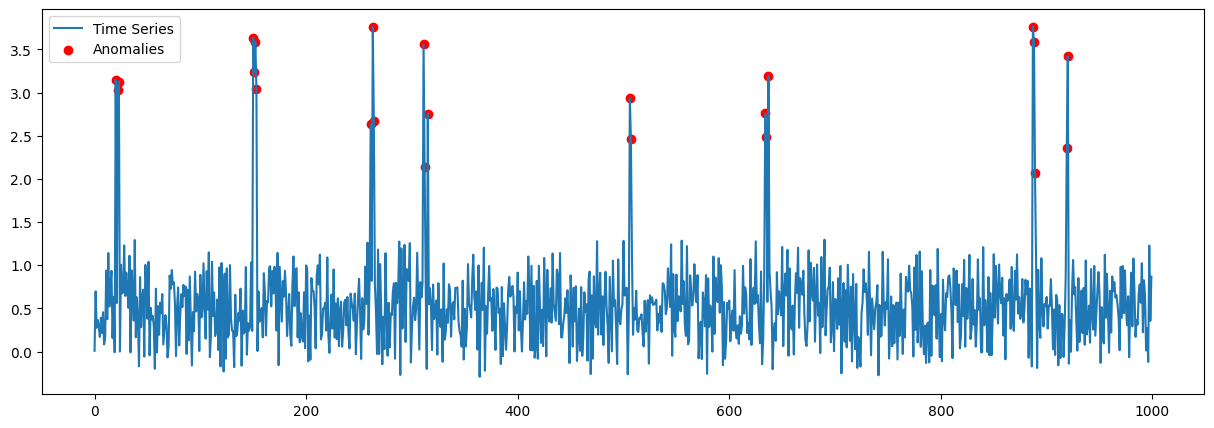

In [63]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=True
include_cosine=False
anomaly_length = 5
additional_anomaly_prob=0.5
freq = 20
amp = 0.3

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine,
                                                                   anomaly_length,
                                                                   additional_anomaly_prob,
                                                                   freq,
                                                                   amp)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()

[86, 87, 91, 96, 97, 98, 99, 147, 151, 153, 155, 157, 158, 159, 282, 286, 289, 290, 292, 295, 296, 367, 369, 370, 371, 374, 375, 376, 380, 427, 428, 431, 434, 534, 539, 541, 542, 543, 546, 679, 680, 683, 687, 689, 690, 691, 692, 730, 738, 850, 854, 859, 861, 862, 863, 906, 909, 911, 912, 913, 914, 916, 917, 918]


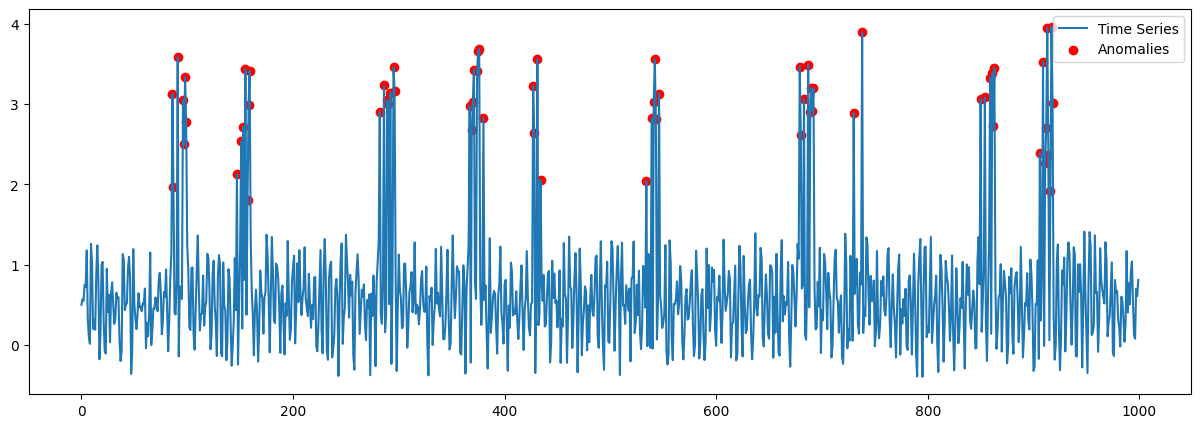

In [68]:
# 함수 사용 예
num_points = 1000
anomaly_rate = 0.01
normal_range = (0, 1)
anomaly_range = (2, 3)
include_sine=True
include_cosine=True
anomaly_length = 15
additional_anomaly_prob=0.4
freq = 40
amp = 0.3

time_series, anomaly_indices = generate_time_series_with_anomalies(num_points, 
                                                                   anomaly_rate, 
                                                                   normal_range, 
                                                                   anomaly_range, 
                                                                   include_sine, 
                                                                   include_cosine,
                                                                   anomaly_length,
                                                                   additional_anomaly_prob,
                                                                   freq,
                                                                   amp)
print(anomaly_indices)

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(time_series, label='Time Series')
plt.scatter(anomaly_indices, time_series[anomaly_indices], color='red', label='Anomalies')
plt.legend()
plt.show()